# Tensegrity structures

### Loading libraries and files

In [46]:
#importing libraries
import numpy as np
import copy
import matplotlib.pyplot as plt
import importlib
from PIL import Image
import imageio
import io

#importing .py files and reloading
import CableTensegrityStruct as CTS
importlib.reload(CTS)
import TensegrityStruct as TS
importlib.reload(TS)
import optimization as opt
importlib.reload(opt)
import plotting
importlib.reload(plotting)
import FreeStandingStruct as FSS
importlib.reload(FSS)

#plt.style.use('fivethirtyeight')

<module 'FreeStandingStruct' from 'c:\\Users\\eirik\\OneDrive\\Documents\\GitHub\\Project---Optimization\\FreeStandingStruct.py'>

### Test example with only cables, fixed nodes

BFGS used 39 iterations


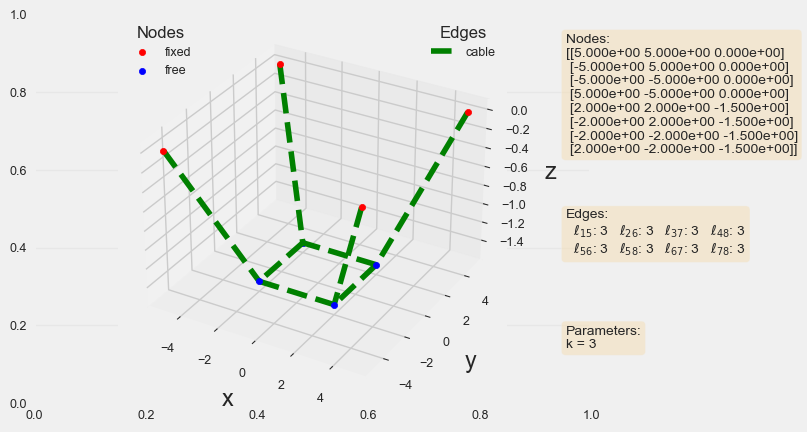

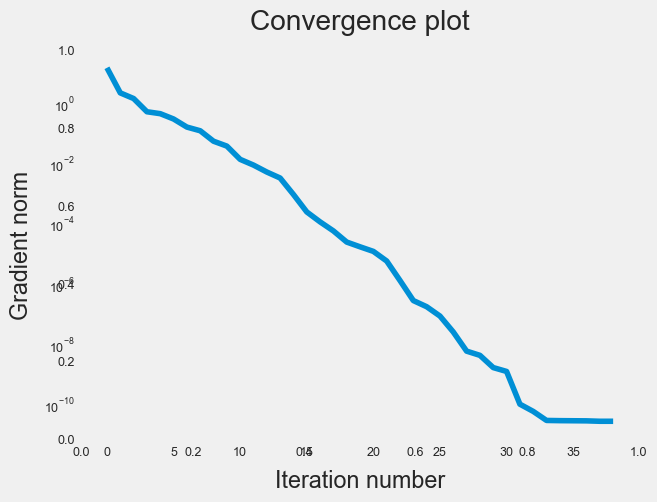

"\nimages = []\nfor fig_i in imgs:\n    # convert the Matplotlib figure to an image\n    buf = io.BytesIO()\n    fig_i.savefig(buf, format='png')\n    buf.seek(0)\n    img = Image.open(buf)\n    images.append(img)\n\n# save the sequence of images as a GIF\nimageio.mimsave('figure1.gif', images, duration=2)\n"

In [47]:
num_of_fixed_nodes = 4

nodes = np.array([[ 5,  5,    0],
                  [-5,  5,    0],
                  [-5, -5,    0],
                  [ 5, -5,    0],
                  [ 2,  2, -1.5],
                  [-2,  2, -1.5],
                  [-2, -2, -1.5],
                  [ 2, -2, -1.5]])

cables = np.array([[0, 4, 3],
                   [1, 5, 3],
                   [2, 6, 3],
                   [3, 7, 3],
                   [4, 5, 3],
                   [4, 7, 3],
                   [5, 6, 3],
                   [6, 7, 3]])

masses = np.array([[4, 1/6],
                   [5, 1/6],
                   [6, 1/6],
                   [7, 1/6]])

k = 3

struct1 = CTS.CableTensegrityStruct(num_of_fixed_nodes,nodes, masses,cables, k)

struct2 = copy.deepcopy(struct1)

#Burde være 000000000000
#print(struct2.gradient())
#fig, ax = plotting.textbox(struct2)
#plt.show()

#Test with random initialization
new_X = np.array([ -5, 8, 0, 3, -4, 3, 1, 3, -2, 3, -3, 0])

struct1.update_nodes(new_X)
#plotting.textbox(struct1)
#plt.show()

norms = opt.BFGS(struct1, return_norms=True)
plotting.plot_structure(struct1)
plt.show()

plotting.convergence_plot(norms)
plt.show()

# create a list of Matplotlib figures

# create a sequence of images
"""
images = []
for fig_i in imgs:
    # convert the Matplotlib figure to an image
    buf = io.BytesIO()
    fig_i.savefig(buf, format='png')
    buf.seek(0)
    img = Image.open(buf)
    images.append(img)

# save the sequence of images as a GIF
imageio.mimsave('figure1.gif', images, duration=2)
"""

### Test example with cables and bars, fixed nodes

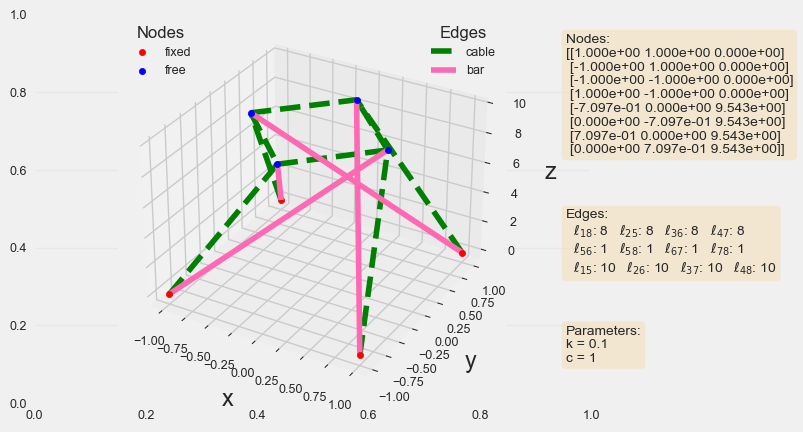

[ 2.06271080e-06  3.13847095e-09 -2.99500203e-08 -3.13847095e-09
  2.06271080e-06 -2.99500203e-08 -2.06271080e-06 -3.13847095e-09
 -2.99500203e-08  3.13847095e-09 -2.06271080e-06 -2.99500203e-08]
BFGS used 29 iterations


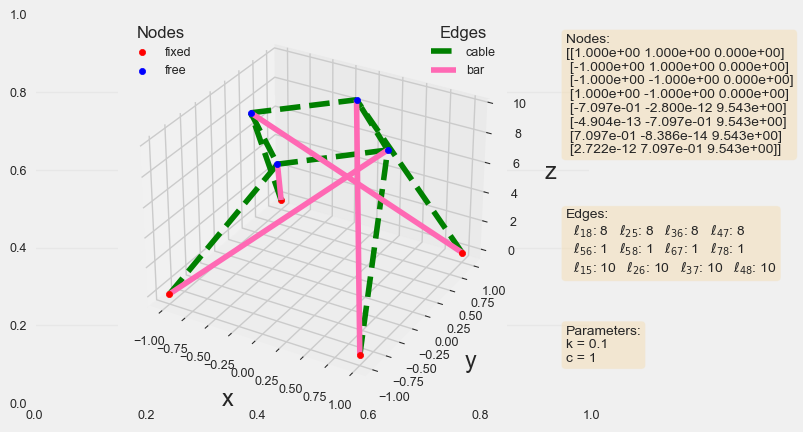

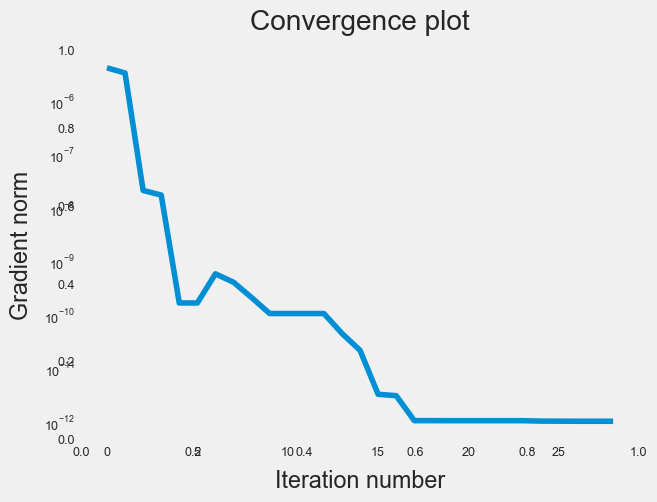

In [48]:
num_of_fixed_nodes = 4

s = 0.70970
t = 9.54287

nodes = np.array([[ 1,  1, 0],
                  [-1,  1, 0],
                  [-1, -1, 0],
                  [ 1, -1, 0],
                  [-s,  0, t],
                  [ 0, -s, t],
                  [ s,  0, t],
                  [ 0,  s, t]])

cables = np.array([[0, 7, 8],
                   [1, 4, 8],
                   [2, 5, 8],
                   [3, 6, 8],
                   [4, 5, 1],
                   [4, 7, 1],
                   [5, 6, 1],
                   [6, 7, 1]])

bars = np.array([[0, 4, 10],
                 [1, 5, 10],
                 [2, 6, 10],
                 [3, 7, 10]])

masses = np.array([])

c=1
k=0.1
bar_density = 0

tensstruct = TS.TensegrityStruct(num_of_fixed_nodes, nodes, masses ,cables, bars, k, c, bar_density)
plotting.plot_structure(tensstruct)
plt.show()
print(tensstruct.gradient())

norms = opt.BFGS(tensstruct, maxiter=100, return_norms=True)

plotting.plot_structure(tensstruct)
plt.show()

plotting.convergence_plot(norms)
plt.show()

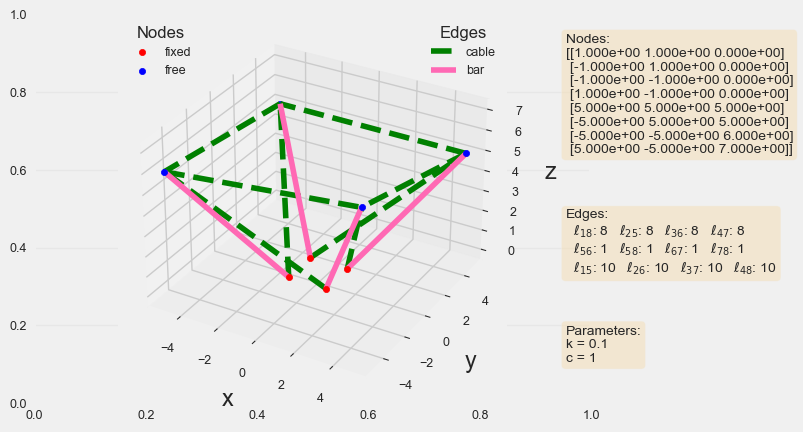

[ 0.88784666  0.88951261 -0.19592004 -0.88757068  0.88834294 -0.10558128
 -0.89336913 -0.89290914 -0.01137571  0.89732665 -0.89940971  0.26489616]
BFGS used 306 iterations


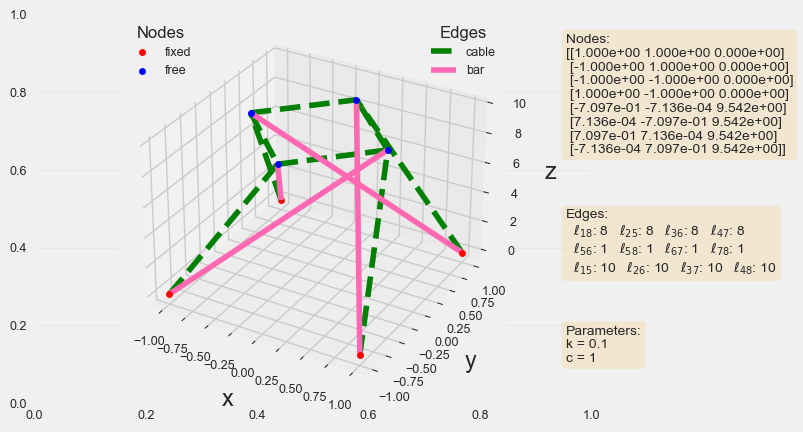

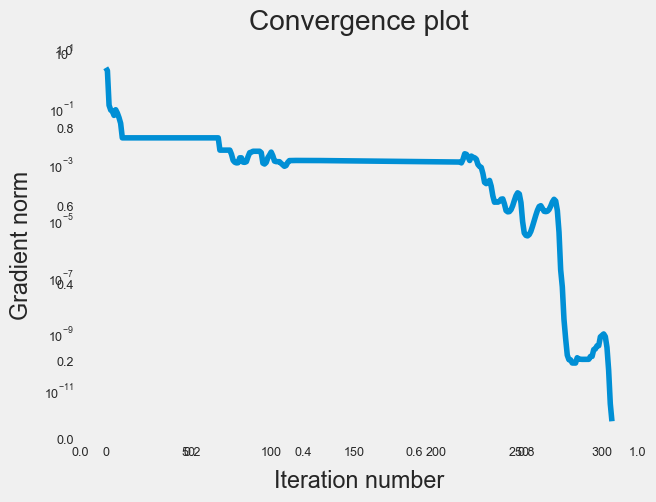

7.423627655073914e-13
[[ 1.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-1.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-1.00000000e+00 -1.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00 -1.00000000e+00  0.00000000e+00]
 [-7.09713802e-01 -7.13631006e-04  9.54234624e+00]
 [ 7.13631484e-04 -7.09713802e-01  9.54234624e+00]
 [ 7.09713803e-01  7.13631195e-04  9.54234624e+00]
 [-7.13630717e-04  7.09713803e-01  9.54234624e+00]]


In [49]:
s = 0.70970
t = 9.54287

num_of_fixed_nodes = 4

nodes = np.array([[ 1,  1, 0],
                  [-1,  1, 0],
                  [-1, -1, 0],
                  [ 1, -1, 0],
                  [-s+0.1,  0+0.1, t+0.1],
                  [ 0-0.1, -s-0.1, t-0.1],
                  [ s+0.1,  0+0.1, t+0.1],
                  [ 0-0.1,  s-0.1, t-0.1]])

nodes = np.array([[ 1.0,  1, 0],
                  [-1,  1, 0],
                  [-1, -1, 0],
                  [ 1, -1, 0],
                  [5,  5, 5],
                  [-5,  5, 5],
                  [-5,  -5, 6],
                  [5,  -5, 7]])

cables = np.array([[0, 7, 8],
                   [1, 4, 8],
                   [2, 5, 8],
                   [3, 6, 8],
                   [4, 5, 1],
                   [4, 7, 1],
                   [5, 6, 1],
                   [6, 7, 1]])

bars = np.array([[0, 4, 10],
                 [1, 5, 10],
                 [2, 6, 10],
                 [3, 7, 10]])

masses = np.array([])

c=1
k=0.1
bar_density = 1e-6

tensstruct = TS.TensegrityStruct(num_of_fixed_nodes, nodes, masses ,cables, bars, k, c, bar_density)

plotting.plot_structure(tensstruct)
plt.show()

print(tensstruct.gradient())

norms = opt.BFGS(tensstruct, maxiter=1000, return_norms=True)

plotting.plot_structure(tensstruct)
plt.show()

plotting.convergence_plot(norms)
plt.show()

print(np.linalg.norm(tensstruct.gradient()))
print(tensstruct.nodes)

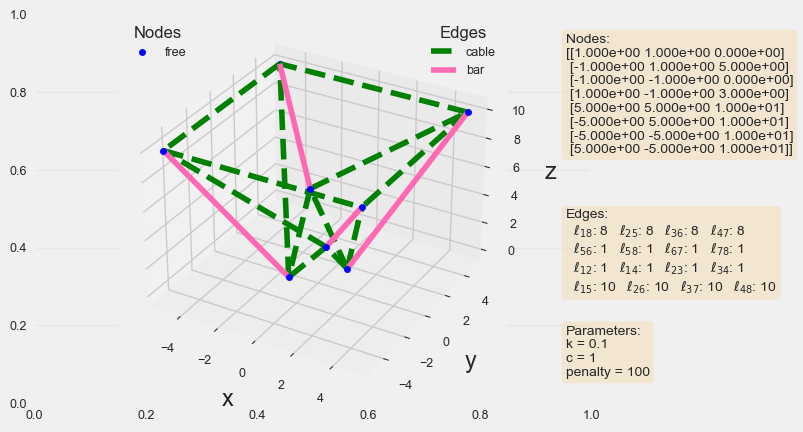

100
[-0.64234463 -0.17667018  0.17529026  0.82989132 -0.13715105 -0.16096816
 -0.64234463  0.15088665 -0.14769961  0.43918679  0.90601243  0.90573644
  0.01370114 -0.88921317  0.8903104  -0.01069046 -0.90709669 -0.90645928
  0.0152421   0.89775002 -0.89884725 -0.00224162]
BFGS used 500 iterations
BFGS used 500 iterations
BFGS used 433 iterations


In [50]:
s = 0.70970
t = 9.54287

num_of_fixed_nodes = 4

nodes = np.array([[ 1,  1, 0],
                  [-1,  1, 0],
                  [-1, -1, 0],
                  [ 1, -1, 0],
                  [-s+0.1,  0+0.1, t+0.1],
                  [ 0-0.1, -s-0.1, t-0.1],
                  [ s+0.1,  0+0.1, t+0.1],
                  [ 0-0.1,  s-0.1, t-0.1]])

nodes = np.array([[ 1,  1, 0],
                  [-1,  1, 5],
                  [-1, -1, 0],
                  [ 1, -1, 3],
                  [ 5,  5, 10],
                  [-5,  5, 10],
                  [-5, -5, 10],
                  [ 5, -5, 10]]).astype(np.float64)

cables = np.array([[0, 7, 8],
                   [1, 4, 8],
                   [2, 5, 8],
                   [3, 6, 8],
                   [4, 5, 1],
                   [4, 7, 1],
                   [5, 6, 1],
                   [6, 7, 1],
                   [0, 1, 1],
                   [0, 3, 1],
                   [1, 2, 1],
                   [2, 3, 1]])

bars = np.array([[0, 4, 10],
                 [1, 5, 10],
                 [2, 6, 10],
                 [3, 7, 10]])

masses = np.array([])

c=1
k=0.1
bar_density = 1e-5

new_struct2 = FSS.FreeStandingStruct(nodes, masses, cables, bars, k, c, bar_density, 100)
plotting.plot_structure(new_struct2)
plt.show()
print(new_struct2.penalty)
print(new_struct2.gradient())
tolerances=np.array([1e-7, 1e-9, 1e-11])
opt.quadratic_penalty_method(new_struct2, 1000, tolerances, maxiter_BFGS=500)


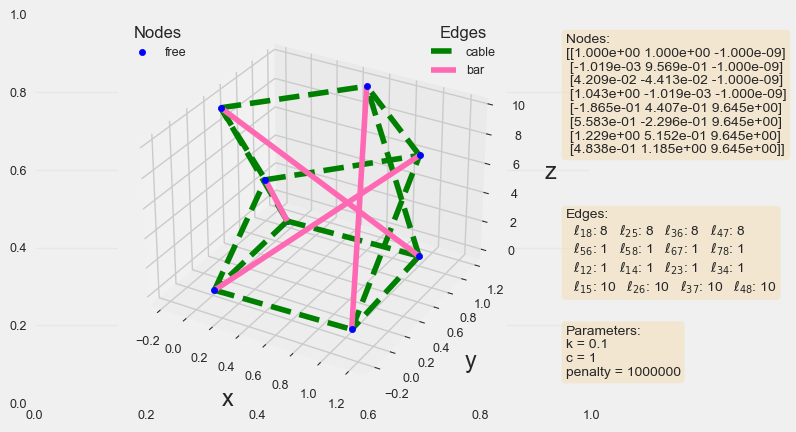

[[ 1.00000000e+00  1.00000000e+00 -1.00000002e-09]
 [-1.01913809e-03  9.56888348e-01 -1.00000000e-09]
 [ 4.20925139e-02 -4.41307901e-02 -1.00000006e-09]
 [ 1.04311165e+00 -1.01913809e-03 -9.99999935e-10]
 [-1.86457410e-01  4.40685087e-01  9.64477201e+00]
 [ 5.58295775e-01 -2.29569062e-01  9.64477201e+00]
 [ 1.22854992e+00  5.15184123e-01  9.64477201e+00]
 [ 4.83796739e-01  1.18543827e+00  9.64477201e+00]]
[ 1.00000000e-04 -1.94406313e-13 -9.47521141e-14  1.00000000e-04
  6.95013166e-14  8.78983030e-14  1.00000000e-04 -7.53442989e-14
  5.16123602e-14  1.00000000e-04 -8.71370576e-14  7.76202019e-15
 -7.88106559e-14  3.53555347e-14 -7.21063834e-14 -4.74013190e-16
  1.33115361e-13 -8.22301211e-14  1.38535017e-14 -7.18709218e-14
  1.51272712e-13  5.42361295e-15]


In [51]:
plotting.plot_structure(new_struct2)
plt.show()

print(new_struct2.nodes)
new_struct2.penalty=0
print(new_struct2.gradient())